# Part II - Prosper Loan Data
## by Ayomide Adenuga

>In this investigation, I would like to look into the features of loans that could affect or predict a borrower's Rate. I am looking to see how certain variables might affect the Rate relationship with another variable.



## Investigation Overview


>In this investigation, I would like to look into the features of loans that could affect or predict a borrower's Rate. I am looking to see how certain variables might affect the Rate relationship with another variable.


## Dataset Overview

> This dataset contains 113,937 loans with 81 variables on each loans,.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# the columns that will be used in the analysis will be selected and stored as 'cols'
# features of interest
cols = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner','DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount','LoanOriginationDate',
       'LoanOriginationQuarter', 'MonthlyLoanPayment', 'DateCreditPulled', 'LoanOriginationQuarter']

df_loan = df[cols]

In [4]:
# Filling missing values with mean
df_loan['BorrowerAPR'] = df_loan['BorrowerAPR'].fillna(df_loan['BorrowerAPR'].mean())

df_loan['ProsperRating (numeric)'] = df_loan['ProsperRating (numeric)'].fillna(df_loan['ProsperRating (numeric)'].mean())

df_loan['ProsperScore'] = df_loan['ProsperScore'].fillna(df_loan['ProsperScore'].mean())

df_loan['DebtToIncomeRatio'] = df_loan['DebtToIncomeRatio'].fillna(df_loan['DebtToIncomeRatio'].mean())

In [5]:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_loan['ListingCategory'] = df_loan['ListingCategory (numeric)'].map(list_dict)
df_loan.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [6]:
# convert column with date to datetime

df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])      

df_loan['ClosedDate'] = pd.to_datetime(df_loan['ClosedDate'])

df_loan['LoanOriginationDate'] = pd.to_datetime(df_loan['LoanOriginationDate'])

df_loan['DateCreditPulled'] = pd.to_datetime(df_loan['DateCreditPulled'])

In [7]:
# Extract year information from ListingCreationDate column
df_loan['year']= df_loan['LoanOriginationDate'].dt.year
df_loan['Listyear'] = df_loan['ListingCreationDate'].dt.year

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> We can infer from the chart that the Borrower's are predominantly living up to their responsibility.

> People still repaying their loan are the highest follwed by those that have completed paying

>  Most of the loans are marked as 'current', followed by 'Completed' and 'Charged off'. This means that most people pay back their loan.

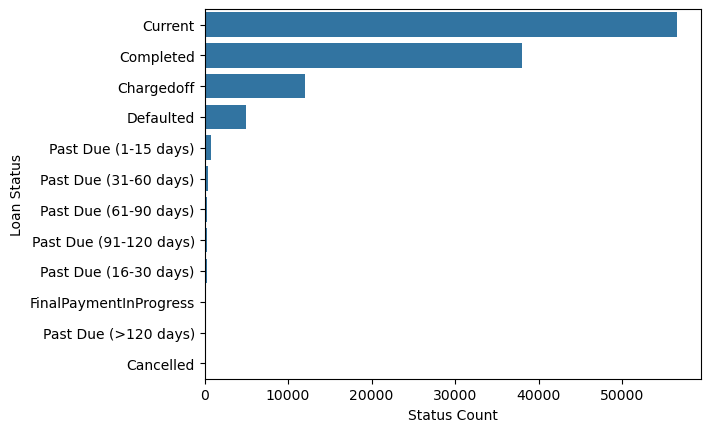

In [8]:
base_color = sb.color_palette()[0]
type_counts = df_loan['LoanStatus'].value_counts()
type_order = type_counts.index
sb.countplot(data = df_loan, y = 'LoanStatus', color = base_color, order =type_order)
plt.ylabel('Loan Status')
plt.xlabel('Status Count');

## (Visualization 2)

> The relationship between the 'BorrowerRate' and the 'BorrowerAPR' has and upward trend this means the higher the Borrower rate the higher the Borrower APR and vice versa.

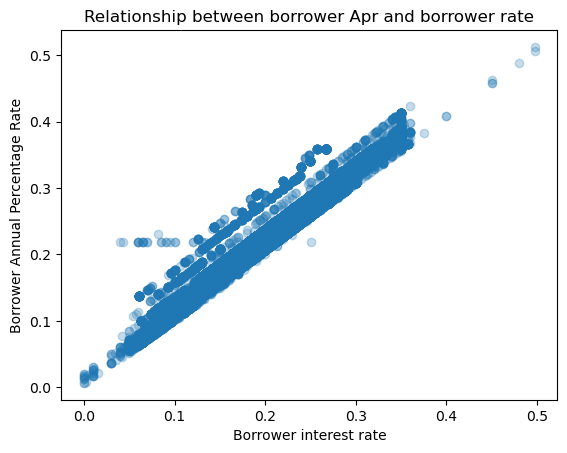

In [10]:
sb.regplot(data = df_loan, x = 'BorrowerRate', y = 'BorrowerAPR', fit_reg = False, scatter_kws={'alpha':5/20})
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Borrower interest rate')
plt.title('Relationship between borrower Apr and borrower rate');

## (Visualization 3)

> Loans with terms of 12 months has the lowest interest.

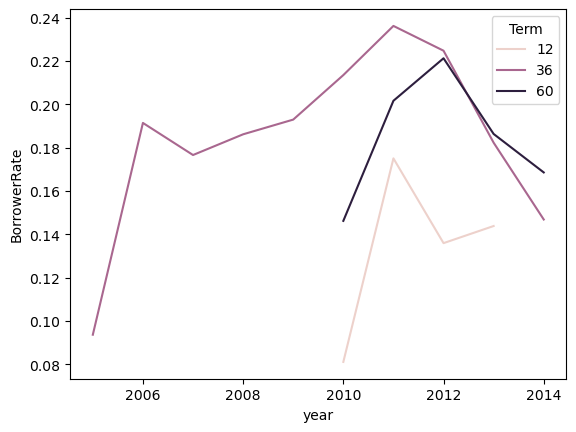

In [11]:
# plots the lineplot to analyze BorrowerAPR by Term over years
g=sb.lineplot(data=df_loan, x='year', y='BorrowerRate', hue='Term',ci=None);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 